# Trabalho Final 

## wine dataset
https://archive.ics.uci.edu/ml/datasets/wine

#### Integrantes:
* BRUNO KEMMER
* LUCIANA SILVA
* ALAN REBELO

Os atributos são: 
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline 

Existem 3 classes: 1 - 3

### Análise do dataset Wine

In [1]:
%matplotlib inline

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
names = ['class','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols'
          ,'proanthocyanins','color_intensity','hue','OD280_OD315_of_diluted_wines','proline']
data = pd.read_csv('../Data/wine.data', names=names)
data.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
y = data.loc[:, "class"]
len(y[y == 3])


48

In [4]:
## Proporção das classes no dataset original
y = data.loc[:,"class"]
unicos = np.unique(y)
for i in range(len(unicos)):
    print("classe[{}]: {:.3f}".format(unicos[i],len(np.where(y == unicos[i])[0]) / len(y) ))
print("\nTotal de elementos: {:d}".format(len(y)))

classe[1]: 0.331
classe[2]: 0.399
classe[3]: 0.270

Total de elementos: 178


Como o trabalho tem o escopo classificação de datasets binários de apenas 2 classes. Serão eliminadas as instâncias
da classe 3 que tem a menor quantidade de elementos.

In [5]:
data_binario = data.loc[data["class"] != 3,:]
data_binario["class"].unique()

array([1, 2])

In [6]:
## Proporção das classes no dataset original
y = data_binario.loc[:,"class"]
unicos = np.unique(y)
for i in range(len(unicos)):
    print("classe[{}]: {:.3f}".format(unicos[i],len(np.where(y == unicos[i])[0]) / len(y) ))
print("\nTotal de elementos: {:d}".format(len(y)))

classe[1]: 0.454
classe[2]: 0.546

Total de elementos: 130


In [7]:
def CrossValidacaoEstratificada(dataset, y, folds=4, seed=42):
    """ Função de Função de CrossValidação Estratificada"""
    np.random.seed(seed)
    npY = np.array(y)
    fold_classes = list()

    #construindo as estruturas
    dataset_fold = list()
    for i in range(folds):
        dataset_fold.append(list())
    fold_atual = 0
    unicos = np.unique(npY)
    for i in range(len(unicos)):
        # cria uma lista das classe e os valores os índices(posições) delas no vetor y
        fold_classes.append(np.where(npY == unicos[i])[0].tolist())
        
        while len(fold_classes[i])>0:
            # sorteia um elemento do vetor de elementos da mesma classe
            if (fold_atual >= folds):
                fold_atual = 0
            index_elemento = np.random.randint(len(fold_classes[i]))
            index = fold_classes[i].pop(index_elemento)
            # Adiciona o elemento sorteado no bucket correspondente
            dataset_fold[fold_atual].append(index)
            fold_atual = fold_atual + 1
    print("\nQuantidade de elementos por bucket:\n")
    for i in range(len(dataset_fold)):
        print("dataset_fold[{:d}]: {:d}".format(i, len(dataset_fold[i])))
    return dataset_fold

In [8]:
def load_wine(normalizar):
    """função que carrega os dados do dataset wine, e remove a classe '3' para se tornar um dataset binário"""
    names = ['class','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols'
              ,'proanthocyanins','color_intensity','hue','OD280_OD315_of_diluted_wines','proline']
    data = pd.read_csv('../Data/wine.data', names=names)
    data_binario = data.loc[data["class"] != 3,:]
    
    if normalizar:
        scaler = StandardScaler()
        scaler.fit(data_binario.drop('class', axis=1))
        X = pd.DataFrame(scaler.transform(data_binario.drop('class', axis=1)), columns=names[1:])
    else:
        X = data_binario.drop('class', axis=1)
    y = data_binario.loc[:,'class']
    return X, y

In [9]:
X, y = load_wine(normalizar=False)
dataset_indexes = CrossValidacaoEstratificada(X, y, folds=4)


Quantidade de elementos por bucket:

dataset_fold[0]: 33
dataset_fold[1]: 33
dataset_fold[2]: 32
dataset_fold[3]: 32


In [10]:
# Verificando a proporção por classe em cada bucket
for i in range(len(dataset_indexes)):
    print("\nBucket[{:d}]".format(i))
    unicos = np.unique(y[dataset_indexes[i]])
    for j in range(len(unicos)):
        print("Classe {:d}:".format(unicos[j]))
        ones = np.sum(y[dataset_indexes[i]] == unicos[j])
        print("{:d} => {:.2f}".format(ones, ones/len(dataset_indexes[i])))


Bucket[0]
Classe 1:
15 => 0.45
Classe 2:
18 => 0.55

Bucket[1]
Classe 1:
15 => 0.45
Classe 2:
18 => 0.55

Bucket[2]
Classe 1:
15 => 0.47
Classe 2:
17 => 0.53

Bucket[3]
Classe 1:
14 => 0.44
Classe 2:
18 => 0.56


## Principal component analysis (PCA)

In [11]:
from sklearn.decomposition import PCA

Executando o método PCA SEM normalização:

In [12]:
X, y = load_wine(normalizar=False)
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([9.98343995e-01, 1.55362310e-03, 7.63069250e-05, 1.06409362e-05,
       6.50980059e-06, 3.62258535e-06, 2.16157559e-06, 1.29291932e-06,
       8.92234080e-07, 4.71751600e-07, 2.57239567e-07, 1.76504821e-07,
       4.92613682e-08])

In [13]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
np.argmax(cumsum >= 0.95) + 1

1

Executando o método PCA COM normalização:

In [14]:
X, y = load_wine(normalizar=True)
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([0.36640702, 0.13866629, 0.1162294 , 0.0905851 , 0.06649361,
       0.05581392, 0.0462666 , 0.03274568, 0.02840447, 0.02255012,
       0.01524325, 0.01467125, 0.0059233 ])

Text(0.5,1,'Gráfico de dispersão de 2 componentes principais (normalizado)')

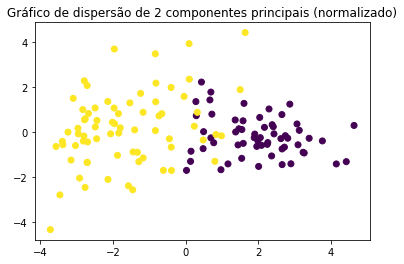

In [15]:
X, y = load_wine(normalizar=True)
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
plt.scatter(X2D[:,0], X2D[:,1], c=y)
plt.title('Gráfico de dispersão de 2 componentes principais (normalizado)')

In [16]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
np.argmax(cumsum >= 0.95) + 1

1

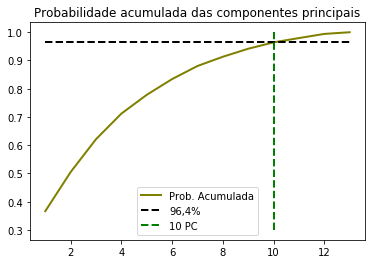

In [17]:
X, y = load_wine(normalizar=True)
pca = PCA()
pca.fit(X)

y = pca.explained_variance_ratio_.cumsum()
x = np.arange(y.shape[0]) + 1

y1 = np.ones(y.shape[0])*0.964
x2 = np.ones(y.shape[0])*9 + 1
y2 = np.linspace(0.3, 1.0, num=y.shape[0])

plt.plot( x, y, marker='', color='olive', linewidth=2, label="Prob. Acumulada")
plt.plot( x, y1, marker='', color='black', linewidth=2, linestyle='dashed', label="96,4%")
plt.plot( x2, y2, marker='', color='green', linewidth=2, linestyle='dashed', label="10 PC")
plt.title('Probabilidade acumulada das componentes principais')
plt.legend()

#### Discussão

A biblioteca PCA do sklearn, utiliza Singular Value Decomposition (SVD) para reduzir as dimensões do dataset. 
Podemos ver que quando não é executada a normalização do dataset uma variável principal carrega quase que a totalidade de variação do dataset.

Quando é feita a normalização, diluimos a variablidade do dataset em 8 variáveis principais, obtendo 96,4% da variação das mesmas.
Entendemos que é importante fazer a normalização do dataset já que as variáveis tem escalas diferentes.

## Selecão de características

Iremos utilizar dois algoritmos de seleção de características:
    1. SelectKBest
    2. Relief
    
O primeiro seletor, selecionará as variáveis que tiverem o maior valor para o teste estatístico chi-quadrado, esse teste mede a dependencia entre variáveis estocásticas, ou seja a dependência entre as características e a variável que contém a classe.

1. SelectKBest: Chi-squared statistics

In [18]:
from sklearn.feature_selection import SelectKBest, chi2

Executando o seletor de características SEM normalização:

In [19]:
X, y = load_wine(normalizar=False)

bestfeatures=SelectKBest(score_func=chi2,k=5)
fit = bestfeatures.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#Concatenando 2 dataframes para melhor visualização

featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(10,'Score'))


                           Specs         Score
12                       proline  14497.066903
9                color_intensity     45.797138
4                      magnesium     44.833856
3              alcalinity_of_ash     17.573073
6                     flavanoids     10.517824
0                        alcohol      5.350222
5                  total_phenols      4.316162
11  OD280_OD315_of_diluted_wines      1.512945
8                proanthocyanins      1.330983
2                            ash      0.611822


Executando o seletor de características COM normalização:

In [20]:
X, y = load_wine(normalizar=True)
X = X - X.min()
bestfeatures=SelectKBest(score_func=chi2,k=5)
fit = bestfeatures.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#Concatenando 2 dataframes para melhor visualização

featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                           Specs      Score
12                       proline  63.695885
0                        alcohol  40.866851
9                color_intensity  40.696465
6                     flavanoids  18.560199
5                  total_phenols  14.086984
3              alcalinity_of_ash  11.906060
4                      magnesium   9.776467
7           nonflavanoid_phenols   8.035764
11  OD280_OD315_of_diluted_wines   6.921250
2                            ash   4.933780


#### Discussão

Proline por estar em uma escala muito superior as demais, milhar, sendo que as outras variáveis são unitárias ou na casa de dezenas e centenas, acaba por dominar a seleção de características. Porém, ao fazermos a normalização do dataset, e como o método requer que todas as variáveis estejam positivas, foi somado o mínimo de cada uma a todos os elementos dessa característica.

Após analizar os resultados achei interessante o peso da característica "proline", buscando na literatura é comprovado que esse aminoácido existe em grandes quantidades em uvas da california, principalmente Cabernet Sauvignon e Merlot e aparece em maior quantidade em variedades de uvas brancas versus uvas vermelhas, logo pode ser que separe bem as classes de uvas.

OUGH, C. "Proline content of grapes and wines", Vitis, 1968.

2. Relief 
(implementação própria)

In [21]:
def Relief(D, C, S, NoSample, Threshold, Seed):
    '''D: Training set
    C: class vector
    S: Original feature set
    NoSample: Number of instances
    Threshold: Threshold to select the features
    Seed: Seed to random selections
    T: Array of selected features
    W: Weight of each feature'''
    
    T = list()
    W = np.zeros(len(S))
#     import pdb; pdb.set_trace()
    np.random.seed(Seed)
    random_choice = np.random.randint(low=0, high=len(D), size=NoSample)
    
    for i in range(NoSample):
        
        # Randomly choosing an instance x in D
        x = D.iloc[random_choice[i]]
        # class of the instance x
        x_class = C[random_choice[i]]
        
        # Calculating the euclidean distance vector
        ## subsetting by class
        same_class = D[C == x_class]
        diff_class = D[C != x_class]
        
        ## broadcasting the instance x in a matrix with the right shape
        x_matrix_same = np.array(x) + np.zeros((len(same_class), len(x)))
        x_matrix_diff = np.array(x) + np.zeros((len(diff_class), len(x)))
        
        euclidean_distance_same = np.sqrt(np.sum(np.power(np.add(x_matrix_same, - same_class), 2), axis=1))
        euclidean_distance_diff = np.sqrt(np.sum(np.power(np.add(x_matrix_diff, - diff_class), 2), axis=1))
        
        ## Near Hit: The instance with the minimum Euclidean distance among all the instances of the same class.
        ### removing the distance to x
        near_hit = np.argmax(euclidean_distance_same == np.min(euclidean_distance_same.drop(random_choice[i])))
        ## Near Miss: The instance with the minimum Euclidean distance among all the instances of the different class.
        near_miss = np.argmax(euclidean_distance_diff == np.min(euclidean_distance_diff))
        ### when A is continuous diff(A,I1,I2) is defined as |value(A,I1) - value(A,I2)| / ( max(A) - min(A) )
        # diff near hit
        divisor = np.add(D.max(0), - D.min(0))
        Diff = np.divide(np.abs(np.add(x, - D.iloc[near_hit])), divisor)
        W = np.add(W, np.multiply(Diff, 1/NoSample))
    print(W.sort_values(ascending=False))
    # return all features which surpass the threshold
    return W[W >= Threshold].index
help(Relief)

Help on function Relief in module __main__:

Relief(D, C, S, NoSample, Threshold, Seed)
    D: Training set
    C: class vector
    S: Original feature set
    NoSample: Number of instances
    Threshold: Threshold to select the features
    Seed: Seed to random selections
    T: Array of selected features
    W: Weight of each feature



In [22]:
# Importando o dataset e normalizando
X, y = load_wine(normalizar=True)

In [23]:
S = X.columns
NoSample = 30
Threshold = 0.1
Seed = 42
T = Relief(X, y, S, NoSample, Threshold, Seed)
print("\nCaracterísticas selecionadas:\n")
print(T)

OD280_OD315_of_diluted_wines    0.123513
proline                         0.107228
nonflavanoid_phenols            0.106289
alcohol                         0.104737
alcalinity_of_ash               0.101375
hue                             0.089542
color_intensity                 0.084646
total_phenols                   0.082614
magnesium                       0.079348
proanthocyanins                 0.075079
flavanoids                      0.069771
ash                             0.065597
malic_acid                      0.061594
Name: 102, dtype: float64

Características selecionadas:

Index(['alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols',
       'OD280_OD315_of_diluted_wines', 'proline'],
      dtype='object')


/home/bkemmer/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


#### Discussão
Podemos ver que nesse modo, a característica proline não teve um peso tão forte como no anterior, ficando com um valor abaixo da característica: OD280_OD315_of_diluted_wines , para nossas análises usaremos as variáveis acima do limite 0.1, compondo 5.

# SVM

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer

#### Testando SVM sem normalizar

In [25]:
X, y = load_wine(normalizar=False)
svm_not_scalled = LinearSVC(C=1, loss="hinge", random_state=1)
cv = StratifiedKFold(n_splits=10, random_state=1)
print(cross_val_score(svm_not_scalled, X, y, cv=cv))
print("\nMédia: {:.3f}".format(cross_val_score(svm_not_scalled, X, y, cv=cv).mean()))

[0.92857143 0.92307692 0.84615385 0.76923077 0.92307692 0.61538462
 0.53846154 0.92307692 0.92307692 1.        ]

Média: 0.839


#### Testando SVM COM normalização

In [26]:
X, y = load_wine(normalizar=True)
svm_scalled = LinearSVC(C=1, loss="hinge", random_state=1)
cv = StratifiedKFold(n_splits=10, random_state=1)
print(cross_val_score(svm_not_scalled, X, y, cv=cv))
print("\nMédia: {:.3f}".format(cross_val_score(svm_scalled, X, y, cv=cv).mean()))

[1.         0.92307692 1.         1.         1.         0.92307692
 0.92307692 1.         0.92307692 1.        ]

Média: 0.969


In [27]:
def metricas(classificador, X, y, folds, seed=42):
    np.random.seed(seed)
    recall = cross_val_score(classificador, X, y, cv=folds, scoring='recall')
    precision = cross_val_score(classificador, X, y, cv=folds, scoring='precision')
    accuracy = cross_val_score(classificador, X, y, cv=folds, scoring='accuracy')
    return (np.mean(recall), np.mean(precision), np.mean(accuracy))

In [28]:
def scalling_and_svc(X, y, kernel=["linear"], C=[1], gamma=[1], degree=[1,2,3], folds=10):
    # cria um DataFrame multinível dos resultados
    index_linear = pd.Index(C, name='C')
    columns_linear = pd.Index(['Recall', 'Precision', 'Accuracy'], name='Metrics')
    index_poly = pd.Index(degree, name='Degree')
    index_rbf = pd.Index(gamma, name='Gamma')
    columns = pd.MultiIndex.from_product([pC, ['Recall', 'Precision', 'Accuracy']], names=['C', 'Metrics'])
    results_linear = pd.DataFrame([], columns=columns_linear)
    results_poly = pd.DataFrame([],index=index_poly, columns=columns)
    results_rbf = pd.DataFrame([],index=index_rbf, columns=columns)
    
    
    for k in kernel:
        for i in C:
            if k == "rbf":
                for g in gamma:
                    svm_scalled = Pipeline((
                                ("scaler", StandardScaler()),
                                ("svc", SVC(kernel=k, gamma=g, C=i))
                            ))
                    svm_scalled.fit(X, y)
                    recall, precision, accuracy = metricas(svm_scalled, X, y, folds)
                    results_rbf.loc[g,i]['Recall'] = np.round(recall, decimals=3)
                    results_rbf.loc[g,i]['Precision'] = np.round(precision, decimals=3)
                    results_rbf.loc[g,i]['Accuracy'] = np.round(accuracy, decimals=3)

            elif k == "poly":
                for d in degree:
                    svm_scalled = Pipeline((
                                ("scaler", StandardScaler()),
                                ("svc", SVC(kernel=k, C=i, coef0=1, degree=d))
                            ))
                    svm_scalled.fit(X,y)
                    recall, precision, accuracy  = metricas(svm_scalled, X, y, folds)
                    results_poly.loc[d,i]['Recall'] = np.round(recall, decimals=3)
                    results_poly.loc[d,i]['Precision'] = np.round(precision, decimals=3)
                    results_poly.loc[d,i]['Accuracy'] = np.round(accuracy, decimals=3)
            elif k == "linear": #case linear
                svm_scalled = Pipeline((
                                ("scaler", StandardScaler()),
                                ("svc", SVC(kernel=k, C=i))
                            ))
                svm_scalled.fit(X,y)
                recall, precision, accuracy  = metricas(svm_scalled, X, y, folds)
                results_linear.loc[i, 'Recall'] = np.round(recall, decimals=3)
                results_linear.loc[i, 'Precision'] = np.round(precision, decimals=3)
                results_linear.loc[i, 'Accuracy'] = np.round(accuracy, decimals=3)
    return results_linear, results_poly, results_rbf

In [29]:
X, y = load_wine(normalizar=True)

kernel = ["linear", "poly", "rbf"]
pC = [0.01, 0.1, 1, 10, 100]
pGamma = [0.1, 1, 10]
degree=[1,2,3]
folds = 10

warnings.filterwarnings('ignore')
# Resultados usando todas as variáveis
results_linear, results_poly, results_rbf = scalling_and_svc(X, y, kernel=kernel, C=pC, degree=degree, gamma= pGamma, folds = folds)

In [30]:
# Resultados usando 10 PCA
pca = PCA(n_components=10)
X_PCA = pca.fit_transform(X)
results_PCA_linear, results_PCA_poly, results_PCA_rbf = scalling_and_svc(X_PCA, y, kernel=kernel, C=pC, degree=degree, gamma= pGamma, folds = folds)

In [31]:
# Resultados utilizando o método SelectKBest com k=6, critério score > 10
caracteristicas = ['proline', 'alcohol', 'color_intensity', 'flavanoids', 'total_phenols', 'alcalinity_of_ash']
X_kbest = X.loc[:,caracteristicas]
results_kbest_linear, results_kbest_poly, results_kbest_rbf = scalling_and_svc(X_kbest, y, kernel=kernel, C=pC, degree=degree, gamma= pGamma, folds = folds)

In [32]:
# Resultados utilizando o método Relief com 5 características
caracteristicas = ['alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols','OD280_OD315_of_diluted_wines', 'proline']
X_relief = X.loc[:,caracteristicas]
results_relief_linear, results_relief_poly, results_relief_rbf = scalling_and_svc(X_relief, y, kernel=kernel, C=pC, degree=degree, gamma= pGamma, folds = folds)

## SVM LINEAR

In [33]:
print('\033[1m  *** SVM normalizada, todas as características e com kernel Linear ***  \033[0m')
results_linear

  *** SVM normalizada, todas as características e com kernel Linear ***  


Metrics,Recall,Precision,Accuracy
0.01,0.983,0.971,0.977
0.10,0.983,0.983,0.984
1.00,0.983,0.957,0.969
10.00,0.983,0.957,0.969
100.00,0.983,0.957,0.969


In [34]:
print('\033[1m  *** SVM normalizada,  10 PCAs e com kernel Linear ***  \033[0m')
results_PCA_linear

  *** SVM normalizada,  10 PCAs e com kernel Linear ***  


Metrics,Recall,Precision,Accuracy
0.01,0.917,1,0.962
0.10,0.967,0.983,0.977
1.00,0.983,0.986,0.985
10.00,0.967,1,0.985
100.00,0.967,1,0.985


In [35]:
print('\033[1m  *** SVM normalizada,  SelectKBest (k=6) e com kernel Linear ***  \033[0m')
print("Características selecionadas: \t'proline', 'alcohol', 'color_intensity',")
print("\t\t\t\t'flavanoids', 'total_phenols', 'alcalinity_of_ash'")
results_kbest_linear

  *** SVM normalizada,  SelectKBest (k=6) e com kernel Linear ***  
Características selecionadas: 	'proline', 'alcohol', 'color_intensity',
				'flavanoids', 'total_phenols', 'alcalinity_of_ash'


Metrics,Recall,Precision,Accuracy
0.01,0.933,0.969,0.955
0.10,0.95,0.957,0.954
1.00,0.933,0.946,0.94
10.00,0.95,0.961,0.955
100.00,0.983,0.946,0.963


In [36]:
print('\033[1m  *** SVM normalizada,  Relief (5 carac.) e com kernel Linear ***  \033[0m')
print("Características selecionadas: \t'alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols',")
print("\t\t\t\t'OD280_OD315_of_diluted_wines', 'proline'")
results_relief_linear

  *** SVM normalizada,  Relief (5 carac.) e com kernel Linear ***  
Características selecionadas: 	'alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols',
				'OD280_OD315_of_diluted_wines', 'proline'


Metrics,Recall,Precision,Accuracy
0.01,0.95,0.986,0.97
0.10,0.967,0.986,0.977
1.00,0.933,0.93,0.932
10.00,0.983,0.957,0.969
100.00,1,0.971,0.985


### SVM POLINOMIAL

In [37]:
print('\033[1m  *** SVM normalizada e com kernel polinomial ***  \033[0m')
results_poly

  *** SVM normalizada e com kernel polinomial ***  


C       0.01                      0.10                      1.00              \
Metrics Recall Precision Accuracy Recall Precision Accuracy Recall Precision   
Degree                                                                         
1        0.033       0.2    0.561  0.967     0.971    0.969  0.983     0.969   
2        0.767         1    0.893  0.967     0.971    0.969      1     0.971   
3          0.9     0.971    0.938      1     0.955    0.976      1     0.971   

C                10.00                     100.00                     
Metrics Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Degree                                                                
1          0.976  0.983      0.94    0.961  0.983     0.957    0.969  
2          0.985      1     0.961    0.977      1     0.961    0.977  
3          0.985      1     0.971    0.985      1     0.971    0.985

In [38]:
print('\033[1m  *** SVM normalizada,  10 PCAs e com kernel polinomial ***  \033[0m')
results_PCA_poly

  *** SVM normalizada,  10 PCAs e com kernel polinomial ***  


C       0.01                      0.10                      1.00              \
Metrics Recall Precision Accuracy Recall Precision Accuracy Recall Precision   
Degree                                                                         
1            0         0    0.546  0.917         1    0.962  0.967     0.983   
2            0         0    0.546      1         1        1      1     0.971   
3        0.067       0.3    0.576      1     0.986    0.992      1     0.986   

C                10.00                     100.00                     
Metrics Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Degree                                                                
1          0.977  0.983     0.986    0.985  0.967         1    0.985  
2          0.985      1     0.946     0.97      1     0.946     0.97  
3          0.992      1     0.943     0.97      1     0.943     0.97

In [39]:
print('\033[1m  *** SVM normalizada,  SelectKBest (k=6) e com kernel polinomial ***  \033[0m')
print("Características selecionadas: \t'proline', 'alcohol', 'color_intensity',")
print("\t\t\t\t'flavanoids', 'total_phenols', 'alcalinity_of_ash'")
results_kbest_poly

  *** SVM normalizada,  SelectKBest (k=6) e com kernel polinomial ***  
Características selecionadas: 	'proline', 'alcohol', 'color_intensity',
				'flavanoids', 'total_phenols', 'alcalinity_of_ash'


C       0.01                      0.10                      1.00              \
Metrics Recall Precision Accuracy Recall Precision Accuracy Recall Precision   
Degree                                                                         
1        0.717         1     0.87  0.917     0.969    0.947  0.933     0.944   
2          0.9     0.983    0.947   0.95     0.983     0.97  0.983     0.946   
3          0.9     0.983    0.947  0.983     0.971    0.977  0.983     0.921   

C                10.00                     100.00                     
Metrics Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Degree                                                                
1           0.94  0.933     0.961    0.947  0.967     0.946    0.955  
2          0.962  0.983      0.95    0.963      1     0.961    0.977  
3          0.947  0.983     0.946    0.962      1     0.946     0.97

In [40]:
print('\033[1m  *** SVM normalizada,  Relief (5 carac.) e com kernel polinomial ***  \033[0m')
print("Características selecionadas: \t'alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols',")
print("\t\t\t\t'OD280_OD315_of_diluted_wines', 'proline'")
results_relief_poly

  *** SVM normalizada,  Relief (5 carac.) e com kernel polinomial ***  
Características selecionadas: 	'alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols',
				'OD280_OD315_of_diluted_wines', 'proline'


C       0.01                      0.10                      1.00              \
Metrics Recall Precision Accuracy Recall Precision Accuracy Recall Precision   
Degree                                                                         
1        0.353       0.9    0.706   0.95     0.986     0.97   0.95     0.958   
2        0.917         1    0.962   0.95     0.986     0.97  0.983     0.946   
3        0.933         1     0.97   0.95     0.986     0.97  0.933     0.936   

C                10.00                     100.00                     
Metrics Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Degree                                                                
1          0.955  0.933      0.94     0.94  0.967     0.952    0.962  
2          0.963      1      0.95     0.97      1      0.95     0.97  
3           0.94      1     0.961    0.978      1     0.961    0.978

### SVM RBF

In [41]:
print('\033[1m  *** SVM normalizada e com kernel RBF ***  \033[0m')
results_rbf

  *** SVM normalizada e com kernel RBF ***  


C       0.01                      0.10                      1.00              \
Metrics Recall Precision Accuracy Recall Precision Accuracy Recall Precision   
Gamma                                                                          
0.1          0         0    0.546  0.933         1    0.969  0.983         1   
1.0          0         0    0.546      0         0    0.546  0.357         1   
10.0         0         0    0.546      0         0    0.546      0         0   

C                10.00                     100.00                     
Metrics Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Gamma                                                                 
0.1        0.992      1         1        1      1         1        1  
1.0        0.708  0.407         1    0.731  0.407         1    0.731  
10.0       0.546      0         0    0.546      0         0    0.546

In [42]:
print('\033[1m  *** SVM normalizada,  10 PCAs e com kernel RBF ***  \033[0m')
results_PCA_rbf

  *** SVM normalizada,  10 PCAs e com kernel RBF ***  


C       0.01                      0.10                      1.00              \
Metrics Recall Precision Accuracy Recall Precision Accuracy Recall Precision   
Gamma                                                                          
0.1          0         0    0.546  0.443       0.9    0.747  0.983     0.971   
1.0          0         0    0.546      0         0    0.546  0.323         1   
10.0         0         0    0.546      0         0    0.546      0         0   

C                10.00                     100.00                     
Metrics Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Gamma                                                                 
0.1        0.977  0.983     0.986    0.985  0.983     0.986    0.985  
1.0        0.693  0.423         1    0.739  0.423         1    0.739  
10.0       0.546      0         0    0.546      0         0    0.546

In [43]:
print('\033[1m  *** SVM normalizada,  SelectKBest (k=6) e com kernel RBF ***  \033[0m')
print("Características selecionadas: \t'proline', 'alcohol', 'color_intensity',")
print("\t\t\t\t'flavanoids', 'total_phenols', 'alcalinity_of_ash'")
results_kbest_rbf

  *** SVM normalizada,  SelectKBest (k=6) e com kernel RBF ***  
Características selecionadas: 	'proline', 'alcohol', 'color_intensity',
				'flavanoids', 'total_phenols', 'alcalinity_of_ash'


C       0.01                      0.10                      1.00              \
Metrics Recall Precision Accuracy Recall Precision Accuracy Recall Precision   
Gamma                                                                          
0.1          0         0    0.546   0.95     0.986     0.97  0.983     0.986   
1.0          0         0    0.546  0.187       0.8     0.63  0.933     0.983   
10.0         0         0    0.546      0         0    0.546  0.067       0.3   

C                10.00                     100.00                     
Metrics Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Gamma                                                                 
0.1        0.985  0.983      0.95    0.963      1     0.971    0.985  
1.0        0.963   0.95     0.986     0.97   0.95     0.986     0.97  
10.0       0.577    0.1       0.3    0.592    0.1       0.3    0.592

In [44]:
print('\033[1m  *** SVM normalizada,  Relief (5 carac.) e com kernel RBF ***  \033[0m')
print("Características selecionadas: \t'alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols',")
print("\t\t\t\t'OD280_OD315_of_diluted_wines', 'proline'")
results_relief_rbf

  *** SVM normalizada,  Relief (5 carac.) e com kernel RBF ***  
Características selecionadas: 	'alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols',
				'OD280_OD315_of_diluted_wines', 'proline'


C       0.01                      0.10                      1.00              \
Metrics Recall Precision Accuracy Recall Precision Accuracy Recall Precision   
Gamma                                                                          
0.1          0         0    0.546   0.95         1    0.977  0.983         1   
1.0          0         0    0.546  0.293       0.9    0.678  0.917     0.986   
10.0         0         0    0.546      0         0    0.546  0.193       0.7   

C                10.00                     100.00                     
Metrics Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Gamma                                                                 
0.1        0.992      1     0.946     0.97      1     0.961    0.978  
1.0        0.954  0.917     0.969    0.947  0.917     0.969    0.947  
10.0       0.633  0.193       0.7    0.633  0.193       0.7    0.633

# Redes Neurais

In [45]:
from sklearn.neural_network import MLPClassifier
# Training the MLP
# we will use the sgd representing the stochastic gradient descent
X, y = load_wine(normalizar=True)
mlp = MLPClassifier(solver='sgd', alpha=0.1,
                    hidden_layer_sizes=(5, 2), random_state=1)
revocacao, precisao, acuracia = metricas(mlp, X, y, folds=10)
print("Revocação: {}".format(np.round(revocacao, decimals=3)))
print("Precisão: {}".format(np.round(precisao, decimals=3)))
print("Acurácia: {}".format(np.round(acuracia, decimals=3)))

Revocação: 0.883
Precisão: 0.961
Acurácia: 0.923


In [46]:
def training_MLP(X, y, folds, layers, neurons, learning_rate):
    columns = pd.MultiIndex.from_product([neurons, layers, ['Recall', 'Precision', 'Accuracy']], 
                                         names=['Neurons', 'Layers', 'Metrics'])
    index = pd.Index(learning_rate, name='Learning rate')
    results = pd.DataFrame([],index=index, columns=columns)
    for layer in layers:
        for neuron in neurons:
            for l_rate in learning_rate:
                mlp = MLPClassifier(solver='sgd', alpha=l_rate,
                        hidden_layer_sizes=(neuron, layer), random_state=1)
                revocacao, precisao, acuracia = metricas(mlp, X, y, folds=folds)
                results.loc[l_rate,neuron][layer]['Recall'] = np.round(revocacao, decimals=3)
                results.loc[l_rate,neuron][layer]['Precision'] = np.round(precisao, decimals=3)
                results.loc[l_rate,neuron][layer]['Accuracy'] = np.round(acuracia, decimals=3)
    return results

In [47]:
layers = [1, 2, 3]
neurons = [2, 5, 10]
learning_rate = [0.1, 0.05, 0.01] # learning rates
folds = 10
results = training_MLP(X, y, folds, layers, neurons, learning_rate)

In [48]:
results.to_csv('MLP_todas_caracteristicas.csv', sep=';', encoding='utf-8')
results.head()

Neurons           2                                                       \
Layers             1                         2                         3   
Metrics       Recall Precision Accuracy Recall Precision Accuracy Recall   
Learning rate                                                              
0.10               0         0    0.546  0.083     0.383    0.531    0.8   
0.05               0         0    0.546  0.083     0.383    0.531    0.8   
0.01               0         0    0.546  0.083     0.383    0.524    0.8   

Neurons                              5    ...                 10            \
Layers                                1   ...           3      1             
Metrics       Precision Accuracy Recall   ...    Accuracy Recall Precision   
Learning rate                             ...                                
0.10              0.918    0.863  0.947   ...       0.938      0         0   
0.05              0.918    0.863  0.947   ...       0.938      0         0   
0.01              0.918    0.863  0.947   ...       0.938      0         0   

Neurons                                                                     
Layers                      2                         3                     
Metrics       Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Learning rate                                                               
0.10             0.546      1     0.484    0.515      0         0    0.546  
0.05             0.546      1     0.488    0.523      0         0    0.546  
0.01             0.546      1     0.488    0.523      0         0    0.546  

[3 rows x 27 columns]

In [49]:
# PCA 10
# Resultados usando 10 PCA
pca = PCA(n_components=10)
X_PCA = pca.fit_transform(X)
results = training_MLP(X_PCA, y, folds, layers, neurons, learning_rate)
results.to_csv('MLP_PCA10.csv', sep=';', encoding='utf-8')
results.head()

Neurons           2                                                       \
Layers             1                         2                         3   
Metrics       Recall Precision Accuracy Recall Precision Accuracy Recall   
Learning rate                                                              
0.10            0.85     0.971    0.916  0.933       0.7    0.775    0.7   
0.05            0.85     0.971    0.916  0.933       0.7    0.775    0.7   
0.01            0.85     0.971    0.916  0.933       0.7    0.775    0.7   

Neurons                              5    ...                 10            \
Layers                                1   ...           3      1             
Metrics       Precision Accuracy Recall   ...    Accuracy Recall Precision   
Learning rate                             ...                                
0.10              0.884    0.809      0   ...       0.546      1     0.454   
0.05              0.884    0.809      0   ...       0.546      1     0.454   
0.01              0.884    0.809      0   ...       0.546      1     0.454   

Neurons                                                                     
Layers                      2                         3                     
Metrics       Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Learning rate                                                               
0.10             0.454  0.883     0.866    0.868      1     0.454    0.454  
0.05             0.454  0.883     0.855    0.861      1     0.454    0.454  
0.01             0.454  0.883     0.855    0.861      1     0.454    0.454  

[3 rows x 27 columns]

In [50]:
# Resultados utilizando o método Relief com 5 características
caracteristicas = ['alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols','OD280_OD315_of_diluted_wines', 'proline']
X_relief = X.loc[:,caracteristicas]
results = training_MLP(X_relief, y, folds, layers, neurons, learning_rate)
results.to_csv('MLP_Relief.csv', sep=';', encoding='utf-8')
results.head()

Neurons           2                                                       \
Layers             1                         2                         3   
Metrics       Recall Precision Accuracy Recall Precision Accuracy Recall   
Learning rate                                                              
0.10           0.983     0.449    0.446  0.767     0.813    0.803      0   
0.05           0.983     0.449    0.446  0.767     0.813    0.803      0   
0.01           0.983     0.449    0.446  0.767     0.813    0.803      0   

Neurons                              5    ...                 10            \
Layers                                1   ...           3      1             
Metrics       Precision Accuracy Recall   ...    Accuracy Recall Precision   
Learning rate                             ...                                
0.10                  0    0.539      0   ...       0.864      1     0.454   
0.05                  0    0.539      0   ...       0.864      1     0.454   
0.01                  0    0.539      0   ...       0.864      1     0.454   

Neurons                                                                     
Layers                      2                         3                     
Metrics       Accuracy Recall Precision Accuracy Recall Precision Accuracy  
Learning rate                                                               
0.10             0.454  0.867     0.918    0.893  0.717     0.967    0.854  
0.05             0.454  0.867     0.938    0.901  0.717     0.967    0.854  
0.01             0.454  0.867     0.938    0.901  0.717     0.967    0.854  

[3 rows x 27 columns]

# Redes Bayesianas - Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
columns = ['Recall', 'Precision', 'Accuracy']
index = pd.Index(['Todas carac', 'PCA-10', 'SelectKbest5', 'Relief'])
results = pd.DataFrame([],index=index, columns=columns)

print('\033[1m  *** Naive Bayes - Todas as características *** \n  \033[0m')
X, y = load_wine(normalizar=False)
gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
print("Número de instâncias classificadas de forma incorreta, de {}: {}".format(X.shape[0],(y != y_pred).sum()))

revocacao, precisao, acuracia = metricas(gnb, X, y, folds=10)
print("Revocação: {}".format(np.round(revocacao, decimals=3)))
print("Precisão: {}".format(np.round(precisao, decimals=3)))
print("Acurácia: {}".format(np.round(acuracia, decimals=3)))

results.loc['Todas carac', 'Recall'] = np.round(revocacao, decimals=3)
results.loc['Todas carac', 'Precision'] = np.round(precisao, decimals=3)
results.loc['Todas carac', 'Accuracy'] = np.round(acuracia, decimals=3)

  *** Naive Bayes - Todas as características *** 
  
Número de instâncias classificadas de forma incorreta, de 130: 1
Revocação: 0.967
Precisão: 0.971
Acurácia: 0.97


In [53]:
print('\033[1m  *** Naive Bayes - PCA 10 *** \n  \033[0m')
# Resultados usando 10 PCA
pca = PCA(n_components=10)
X_PCA = pca.fit_transform(X)
y_pred = gnb.fit(X_PCA, y).predict(X_PCA)
print("Número de instâncias classificadas de forma incorreta, de {}: {}\n".format(X.shape[0],(y != y_pred).sum()))

revocacao, precisao, acuracia = metricas(gnb, X_PCA, y, folds=10)
print("Revocação: {}".format(np.round(revocacao, decimals=3)))
print("Precisão: {}".format(np.round(precisao, decimals=3)))
print("Acurácia: {}".format(np.round(acuracia, decimals=3)))

results.loc['PCA-10', 'Recall'] = np.round(revocacao, decimals=3)
results.loc['PCA-10', 'Precision'] = np.round(precisao, decimals=3)
results.loc['PCA-10', 'Accuracy'] = np.round(acuracia, decimals=3)

  *** Naive Bayes - PCA 10 *** 
  
Número de instâncias classificadas de forma incorreta, de 130: 3

Revocação: 0.933
Precisão: 0.983
Acurácia: 0.962


In [54]:
print('\033[1m  *** Naive Bayes - SelectKBest com k=6, critério score > 10 *** \n  \033[0m')
print("Características selecionadas: \t'proline', 'alcohol', 'color_intensity',")
print("\t\t\t\t'flavanoids', 'total_phenols', 'alcalinity_of_ash'")

caracteristicas = ['proline', 'alcohol', 'color_intensity', 'flavanoids', 'total_phenols', 'alcalinity_of_ash']
X_kbest = X.loc[:,caracteristicas]

y_pred = gnb.fit(X_kbest, y).predict(X_kbest)
print("Número de instâncias classificadas de forma incorreta, de {}: {}\n".format(X_kbest.shape[0],(y != y_pred).sum()))

revocacao, precisao, acuracia = metricas(gnb, X_kbest, y, folds=10)
print("Revocação: {}".format(np.round(revocacao, decimals=3)))
print("Precisão: {}".format(np.round(precisao, decimals=3)))
print("Acurácia: {}".format(np.round(acuracia, decimals=3)))

results.loc['SelectKbest5', 'Recall'] = np.round(revocacao, decimals=3)
results.loc['SelectKbest5', 'Precision'] = np.round(precisao, decimals=3)
results.loc['SelectKbest5', 'Accuracy'] = np.round(acuracia, decimals=3)

  *** Naive Bayes - SelectKBest com k=6, critério score > 10 *** 
  
Características selecionadas: 	'proline', 'alcohol', 'color_intensity',
				'flavanoids', 'total_phenols', 'alcalinity_of_ash'
Número de instâncias classificadas de forma incorreta, de 130: 3

Revocação: 0.967
Precisão: 0.986
Acurácia: 0.977


In [55]:
print('\033[1m  *** Naive Bayes - Relief (5 carac.) *** \n  \033[0m')
print("Características selecionadas: \t'alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols',")
print("\t\t\t\t'OD280_OD315_of_diluted_wines', 'proline'")

caracteristicas = ['alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols','OD280_OD315_of_diluted_wines', 'proline']
X_relief = X.loc[:,caracteristicas]

y_pred = gnb.fit(X_relief, y).predict(X_relief)
print("Número de instâncias classificadas de forma incorreta, de {}: {}\n".format(X_relief.shape[0],(y != y_pred).sum()))

revocacao, precisao, acuracia = metricas(gnb, X_relief, y, folds=10)
print("Revocação: {}".format(np.round(revocacao, decimals=3)))
print("Precisão: {}".format(np.round(precisao, decimals=3)))
print("Acurácia: {}".format(np.round(acuracia, decimals=3)))

results.loc['Relief', 'Recall'] = np.round(revocacao, decimals=3)
results.loc['Relief', 'Precision'] = np.round(precisao, decimals=3)
results.loc['Relief', 'Accuracy'] = np.round(acuracia, decimals=3)

  *** Naive Bayes - Relief (5 carac.) *** 
  
Características selecionadas: 	'alcohol', 'alcalinity_of_ash', 'nonflavanoid_phenols',
				'OD280_OD315_of_diluted_wines', 'proline'
Número de instâncias classificadas de forma incorreta, de 130: 3

Revocação: 0.967
Precisão: 0.983
Acurácia: 0.978


In [56]:
#Tabela com os resultados finais utilizando Naive Bayes
results

,Recall,Precision,Accuracy
Todas carac,0.967,0.971,0.97
PCA-10,0.933,0.983,0.962
SelectKbest5,0.967,0.986,0.977
Relief,0.967,0.983,0.978


# Árvores de decisão - Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

def RandomForest(X, y, n_estimators, max_features, metodo):
    
    columns = pd.MultiIndex.from_product([n_estimators,['Recall', 'Precision', 'Accuracy']], 
                                     names=['Num Trees','Metrics'])
    index = pd.Index(max_features)
    results = pd.DataFrame([],index=index, columns=columns)
    
    for n_estimator in n_estimators:
        for max_feature in max_features:
            rnd_clf = RandomForestClassifier(n_estimators=n_estimator, max_features=max_feature)
            revocacao, precisao, acuracia = metricas(rnd_clf, X, y, folds=10)
            results.loc[max_feature][n_estimator]['Recall'] = np.round(revocacao, decimals=3)
            results.loc[max_feature][n_estimator]['Precision'] = np.round(precisao, decimals=3)
            results.loc[max_feature][n_estimator]['Accuracy'] = np.round(acuracia, decimals=3)
    return results

In [68]:
# Todas as características
n_estimators = [500, 1000, 10000]
max_features = [3, 4, 5]
X, y = load_wine(normalizar=False)
results = RandomForest(X, y, n_estimators, max_features, metodo='Todas carac')
results

Num Trees  500                       1000                      10000  \
Metrics   Recall Precision Accuracy Recall Precision Accuracy Recall   
3              1     0.986    0.992  0.983     0.986    0.992      1   
4           0.95     0.986    0.985  0.967     0.986    0.977  0.983   
5           0.95     0.986    0.985   0.95     0.986    0.969   0.95   

Num Trees                     
Metrics   Precision Accuracy  
3             0.986    0.992  
4             0.986    0.985  
5             0.986    0.969